# Visualize

Before running this notebook, install the `tempo-embeddings` package in your local environment:

```bash
pip install .
```

See [README.dev.md](../README.dev.md) for more details.

In [1]:
%load_ext autoreload

## Load Corpus

In [2]:
from io import BytesIO
from zipfile import ZipFile
import urllib
from pathlib import Path

SEMEVAL_DATA_URL = (
    "https://www2.ims.uni-stuttgart.de/data/sem-eval-ulscd/semeval2020_ulscd_eng.zip"
)

SEMEVAL2020_DIR = Path("semeval2020_ulscd_eng")

if SEMEVAL2020_DIR.is_dir():
    print(f"Directory '{SEMEVAL2020_DIR}' already exists, skipping corpus download.")
else:
    with urllib.request.urlopen(SEMEVAL_DATA_URL) as f:
        with ZipFile(BytesIO(f.read())) as zipfile:
            zipfile.extractall()

assert SEMEVAL2020_DIR.is_dir(), f"Directory does not exist: '{SEMEVAL2020_DIR}'"

Directory 'semeval2020_ulscd_eng' already exists, skipping corpus download.


In [3]:
CORPUS1_DIR = SEMEVAL2020_DIR / "corpus1"
CORPUS2_DIR = SEMEVAL2020_DIR / "corpus2"
TRUTH_DIR = SEMEVAL2020_DIR / "truth"

assert CORPUS1_DIR.is_dir(), f"Directory does not exist: '{CORPUS1_DIR}'"
assert CORPUS2_DIR.is_dir(), f"Directory does not exist: '{CORPUS2_DIR}'"
assert TRUTH_DIR.is_dir(), f"Directory does not exist: '{TRUTH_DIR}'"

In [4]:
TOKENS_FILE1 = CORPUS1_DIR / "token" / "ccoha1.txt.gz"
TOKENS_FILE2 = CORPUS2_DIR / "token" / "ccoha2.txt.gz"

assert TOKENS_FILE1.is_file()
assert TOKENS_FILE2.is_file()

In [5]:
import gzip

with gzip.open(TOKENS_FILE1, "rt") as f:
    sentences_1810 = f.readlines()

assert len(sentences_1810) == 253644
sentences_1810[:10]

['He may find himself unexpectedly thrown into new and strange positions ; where , after looking carefully around him , he fears to move , lest by a mistaken step , he should do an injury to the cause , which he has it in his heart to serve .\n',
 'First and foremost , he drew forth from a case , in the corner of his lodgings , a brass-buttoned blue coat , of a popular cut , and fell to beating it over the shoulders and down the back with a yard stick , as if he had under his hand the body and person of his direst enemy in the world : then he twisted the right arm up and dashed at the place where the ribs might have been ; then he fell upon the breasts and pumelled them horribly ; and then , casting aside his stick , he fastened fiercely on the collar and gave the whole a mighty shaking , as if he would have the very life out of it .\n',
 '; it was in the latter city that his great discovery was first made public ; or , rather , it was there that he was first suspected of having made i

In [6]:
with gzip.open(TOKENS_FILE2, "rt") as f:
    sentences_1960 = [line.strip() for line in f]
assert len(sentences_1960) == 353692

sentences_1960[:10]

['Oui , yes , " I mumbled , the linguistic transition now in limbo . "',
 "Let 's say you are contentedly cooking hot dogs on one of the park 's rusted barbecue grills at high noon on this oven-hot day .",
 'CERTAIN KINDS of lighting refuse to lie about the relentless , ineluctableprocess of ageing .',
 "Within the first 50 yards , Diduryk 's men came under heavy fire .",
 'Second , there were significant changes in power relations within the community and between the tribal and federal governments .',
 'The hiss of the sprayer was the loudest sound in the room .',
 'I do not intend to try until the Sienese arrive here .',
 'Thus , in discussion of efficiency , the definition of output is crucial to the argument .',
 'In March he formed the Freedom Front Party and registered to participate in the elections .',
 'The contents of the report , along with a letter and attached orders from the secretary of defense , had prompted his request to have Maj. Sara Brannon report to him .']

# Load Model

In [7]:
from tempo_embeddings.embeddings.model import RobertaModelWrapper

model = RobertaModelWrapper.from_pretrained("roberta-base")

/Users/carstenschnober/Documents/SemanticsOfSustainability/workspace/tempo-embeddings/.venv/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Some weights of the model checkpoint at roberta-base were not used when initializing RobertaModel: ['lm_head.layer_norm.weight', 'lm_head.layer_norm.bias', 'lm_head.dense.bias', 'lm_head.decoder.weight', 'lm_head.bias', 'lm_head.dense.weight']
- This IS expected if you are initializing RobertaModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSe

## Process Data

In [8]:
import string
from sklearn.feature_extraction import text

stopwords = set(text.ENGLISH_STOP_WORDS).union(set(string.punctuation))

In [9]:
%autoreload now 

from tempo_embeddings.text.corpus import Corpus

corpus_1960 = Corpus.from_lines(sentences_1960, model=model)
corpus_1960

/Users/carstenschnober/Documents/SemanticsOfSustainability/workspace/tempo-embeddings/.venv/lib/python3.11/site-packages/umap/distances.py:1063: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/Users/carstenschnober/Documents/SemanticsOfSustainability/workspace/tempo-embeddings/.venv/lib/python3.11/site-packages/umap/distances.py:1071: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour

Corpus('None' [Passage('Oui , yes , " I mumbled , the linguistic transition now in limbo . "', {}), Passage("Let 's say you are contentedly cooking hot dogs on one of the park 's rusted barbecue grills at high noon on this oven-hot day .", {}), Passage('CERTAIN KINDS of lighting refuse to lie about the relentless , ineluctableprocess of ageing .', {}), Passage("Within the first 50 yards , Diduryk 's men came under heavy fire .", {}), Passage('Second , there were significant changes in power relations within the community and between the tribal and federal governments .', {}), Passage('The hiss of the sprayer was the loudest sound in the room .', {}), Passage('I do not intend to try until the Sienese arrive here .', {}), Passage('Thus , in discussion of efficiency , the definition of output is crucial to the argument .', {}), Passage('In March he formed the Freedom Front Party and registered to participate in the elections .', {}), Passage('The contents of the report , along with a lett

In [10]:
subcorpus = corpus_1960.subcorpus("efficiency")
subcorpus

Corpus('None' [Passage('Thus , in discussion of efficiency , the definition of output is crucial to the argument .', {}), Passage('Among the 24 Enquirer staffers eliminated in the name of efficiency were two photographers , seven newsmen , the editor of the Sunday feature page-and Managing Editor Ralph L. Holsinger .', {}), Passage('Quickly , now , beyond childlike efficiency , he tied his trouser legs protectively around the', {}), Passage('Voice mail can offer significant productivity and efficiency gains , " says Clark . "', {}), Passage('This is very important : trying to improve those two factors will improve throughput , utilization , and overall efficiency .', {}), Passage('So its Virginia facility is smaller than many -- with 5,000 servers at the moment , but expandable up to 10,000 -- and packed densely for efficiency .', {}), Passage('Photovoltaics , extra insulation , efficiency windows , radiant heating in the floor . "', {}), Passage('But we believe that all such developme

In [11]:
import random

random.sample(subcorpus.highlighted_texts(), 5)

['And it would soon be discovered that the gospel of <b>efficiency</b> , while admirable on some counts , was not in itself a sufficient or practical basis on which to formulate public policy .',
 "At sixteen , the <b>efficiency</b> of our country 's reverse Dunkirk would probably have interested him more than the morality or defensibility of the matter .",
 "The researcher on embryos is interested in curing Alzheimer 's or helping couples become parents ; the military wants order and <b>efficiency</b> to carry out its dangerous mission ; the pro-choice advocates want to protect against any possibility that women will be treated as objects again ; the networks want to depict life as it is --",
 'There are the beginnings of hustle , <b>efficiency</b> and technical expertise .',
 'There are a few products , however , that were so perfect for their purpose and designed with such timeless <b>efficiency</b> that there seems to be no limit to their practical life -- one such item is the sewi

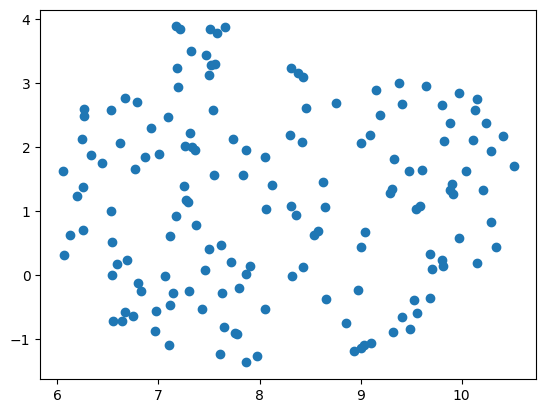

In [12]:
import matplotlib.pyplot as plt

embeddings = subcorpus.umap_embeddings()

plt.scatter(x=embeddings[:, 0], y=embeddings[:, 1])

## Cluster

In [13]:
clusters = subcorpus.clusters()
for cluster in clusters:
    print(cluster)

Corpus('2' [Passage('Thus , in discussion of efficiency , the definition of output is crucial to the argument .', {}), Passage('Among the 24 Enquirer staffers eliminated in the name of efficiency were two photographers , seven newsmen , the editor of the Sunday feature page-and Managing Editor Ralph L. Holsinger .', {}), Passage('This is very important : trying to improve those two factors will improve throughput , utilization , and overall efficiency .', {}), Passage('So its Virginia facility is smaller than many -- with 5,000 servers at the moment , but expandable up to 10,000 -- and packed densely for efficiency .', {}), Passage('Photovoltaics , extra insulation , efficiency windows , radiant heating in the floor . "', {}), Passage("As population increases , and as man 's knowledge and skill in directing the forces of nature widen ... the habitual methods of carrying on the life process of the group as a whole , no longer give the same result as before ... .1/ the scheme according t

In [14]:
[h for h in clusters[-1].highlightings if h.umap_embedding is not None]

[Highlighting(start=128, end=138, token_embedding=[0.0667152926325798, 0.08710823208093643, -0.37372756004333496, -0.24600233137607574, -0.4512447118759155, -0.508216142654419, 0.017857884988188744, -0.2348994016647339, -0.2558010518550873, -0.1496133953332901, 0.34293872117996216, -0.48046910762786865, 0.09546936303377151, 0.5580592155456543, -0.0634554922580719, -1.041297435760498, -0.028241604566574097, -0.07442599534988403, -0.09297926723957062, 0.16452670097351074, 0.09035477787256241, -0.12503254413604736, -0.24940139055252075, 0.0541280135512352, 0.15628764033317566, 0.014829433523118496, -0.34348782896995544, 0.0019369646906852722, 0.44153541326522827, -0.05356823652982712, -0.1966298669576645, -0.18149037659168243, -0.23563694953918457, -0.06178869307041168, -0.2459050714969635, 0.03402955085039139, 0.19326411187648773, 0.0326404795050621, 0.035876162350177765, 0.10334411263465881, -0.20980946719646454, -0.04155222699046135, 0.10474437475204468, -0.015820376574993134, -0.06690

            x         y cluster
0    7.629080 -0.281551       2
1    6.800266 -0.125748       2
2    7.549433  1.564759       2
3    6.540107 -0.006051       2
4    7.778939 -0.925105       2
..        ...       ...     ...
147  7.662305  3.871360       4
148  7.214040  3.850192       4
149  7.558116  3.301393       4
150  7.498212  3.121427       4
151  7.173907  3.886010       4

[152 rows x 3 columns]


<Axes: xlabel='x', ylabel='y'>

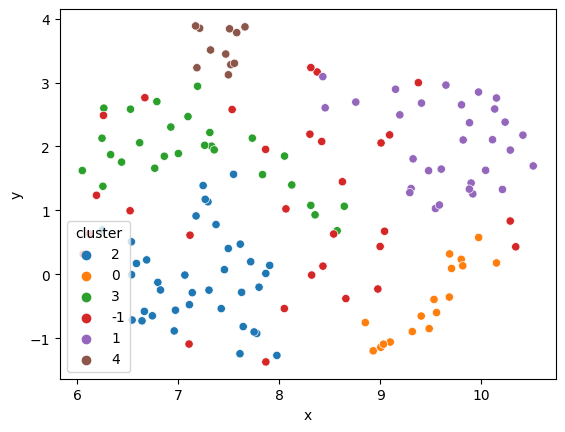

In [15]:
import pandas as pd
import seaborn as sns


rows = []

for cluster in clusters:
    embeddings = cluster.umap_embeddings()

    for embedding in embeddings:
        row = {}
        row["x"] = embedding[0]
        row["y"] = embedding[1]
        row["cluster"] = cluster._label
        rows.append(row)

data = pd.DataFrame(rows)
print(data)
sns.scatterplot(data=data, x="x", y="y", hue="cluster")

# Visualize

In [16]:
# %autoreload now

from tempo_embeddings.visualization.wizmap import WizmapVisualizer

if "visualizer_1960" in locals():
    visualizer_1960.cleanup()

visualizer_1960 = WizmapVisualizer(subcorpus, title="Efficiency in 1960")

In [17]:
port = 8000

visualizer_1960.visualize(port=port)

Starting server on port 8000


<iframe
 srcdoc="<!DOCTYPE html><html lang="en"><head><meta charset="UTF-8" /><meta name="viewport" content="width=device-width, initial-scale=1.0" /><title>WizMap</title><style>html {font-size: 16px;-moz-osx-font-smoothing: grayscale;-webkit-font-smoothing: antialiased;text-rendering: optimizeLegibility;-webkit-text-size-adjust: 100%;-moz-text-size-adjust: 100%;scroll-behavior: smooth;}html, body {position: relative;width: 100%;height: 100%;overscroll-behavior: none;}body {margin: 0px;padding: 0px;box-sizing: border-box;font-family: -apple-system, BlinkMacSystemFont, 'Segoe UI', Roboto, Oxygen-Sans, Ubuntu, Cantarell, 'Helvetica Neue', sans-serif;color: hsl(0, 0%, 29%);font-size: 1em;font-weight: 400;line-height: 1.5;}*, ::after, ::before {box-sizing: inherit;}a {color: rgb(0, 100, 200);text-decoration: none;}a:hover {text-decoration: underline;}a:visited {color: rgb(0, 80, 160);}label {display: block;}input, select, textarea {font-family: inherit;font-size: inherit;-webkit-padding: 0 0;padding: 0;margin: 0 0 0 0;box-sizing: border-box;border: 1px solid #ccc;border-radius: 2px;}input:disabled {color: #ccc;}button {all: unset;outline: none;cursor: pointer;}</style><script defer src='data:text/javascript;base64,dmFyIHdpem1hcD1mdW5jdGlvbigpeyJ1c2Ugc3RyaWN0Ijt2YXIgSmY9T2JqZWN0LmRlZmluZVByb3BlcnR5O3ZhciBQZj0oZWksUSxhbik9PlEgaW4gZWk/SmYoZWksUSx7ZW51bWVyYWJsZTohMCxjb25maWd1cmFibGU6ITAsd3JpdGFibGU6ITAsdmFsdWU6YW59KTplaVtRXT1hbjt2YXIgbXQ9KGVpLFEsYW4pPT4oUGYoZWksdHlwZW9mIFEhPSJzeW1ib2wiP1ErIiI6USxhbiksYW4pO2Z1bmN0aW9uIGVpKCl7fWZ1bmN0aW9uIFEodCxsLGksZSxuKXt0Ll9fc3ZlbHRlX21ldGE9e2xvYzp7ZmlsZTpsLGxpbmU6aSxjb2x1bW46ZSxjaGFyOm59fX1mdW5jdGlvbiBhbih0KXtyZXR1cm4gdCgpfWZ1bmN0aW9uIGgwKCl7cmV0dXJuIE9iamVjdC5jcmVhdGUobnVsbCl9ZnVuY3Rpb24gb2UodCl7dC5mb3JFYWNoKGFuKX1mdW5jdGlvbiBwMCh0KXtyZXR1cm4gdHlwZW9mIHQ9PSJmdW5jdGlvbiJ9ZnVuY3Rpb24gYmQodCxsKXtyZXR1cm4gdCE9dD9sPT1sOnQhPT1sfHx0JiZ0eXBlb2YgdD09Im9iamVjdCJ8fHR5cGVvZiB0PT0iZnVuY3Rpb24ifWZ1bmN0aW9uIFlaKHQpe3JldHVybiBPYmplY3Qua2V5cyh0KS5sZW5ndGg9PT0wfWNvbnN0IHVjPXR5cGVvZiB3aW5kb3c8InUiP3dpbmRvdzp0eXBlb2YgZ2xvYmFsVGhpczwidSI/Z2xvYmFsVGhpczpnbG9iYWw7ZnVuY3Rpb24gWjAodCxsKXt0LmFwcGVuZENoaWxkKGwpfWZ1bmN0aW9uIFdvKHQsbCxpKXtjb25zdCBlPVJaKHQpO2lmKCFlLmdldEVsZW1lbnRCeUlkKGwpKXtjb25zdCBuPUQoInN0eWxlIik7bi5pZD1sLG4udGV4dENvbnRlbnQ9aSxIWihlLG4pfX1mdW5jdGlvbiBSWih0KXtpZighdClyZXR1cm4gZG9jdW1lbnQ7Y29uc3QgbD10LmdldFJvb3ROb2RlP3QuZ2V0Um9vdE5vZGUoKTp0Lm93bmVyRG9jdW1lbnQ7cmV0dXJuIGwmJmwuaG9zdD9sOnQub3duZXJEb2N1bWVudH1mdW5jdGlvbiBIWih0LGwpe3JldHVybiBaMCh0LmhlYWR8fHQsbCksbC5zaGVldH1mdW5jdGlvbiBUWih0LGwsaSl7dC5pbnNlcnRCZWZvcmUobCxpfHxudWxsKX1mdW5jdGlvbiBHMCh0KXt0LnBhcmVudE5vZGUmJnQucGFyZW50Tm9kZS5yZW1vdmVDaGlsZCh0KX1mdW5jdGlvbiBrWih0LGwpe2ZvcihsZXQgaT0wO2k8dC5sZW5ndGg7aSs9MSl0W2ldJiZ0W2ldLmQobCl9ZnVuY3Rpb24gRCh0KXtyZXR1cm4gZG9jdW1lbnQuY3JlYXRlRWxlbWVudCh0KX1mdW5jdGlvbiBjYyh0KXtyZXR1cm4gZG9jdW1lbnQuY3JlYXRlRWxlbWVudE5TKCJodHRwOi8vd3d3LnczLm9yZy8yMDAwL3N2ZyIsdCl9ZnVuY3Rpb24gc2kodCl7cmV0dXJuIGRvY3VtZW50LmNyZWF0ZVRleHROb2RlKHQpfWZ1bmN0aW9uIE50KCl7cmV0dXJuIHNpKCIgIil9ZnVuY3Rpb24gd1oodCxsLGksZSl7cmV0dXJuIHQuYWRkRXZlbnRMaXN0ZW5lcihsLGksZSksKCk9PnQucmVtb3ZlRXZlbnRMaXN0ZW5lcihsLGksZSl9ZnVuY3Rpb24gTVoodCxsLGkpe2k9PW51bGw/dC5yZW1vdmVBdHRyaWJ1dGUobCk6dC5nZXRBdHRyaWJ1dGUobCkhPT1pJiZ0LnNldEF0dHJpYnV0ZShsLGkpfWZ1bmN0aW9uIHZaKHQpe3JldHVybiBBcnJheS5mcm9tKHQuY2hpbGROb2Rlcyl9ZnVuY3Rpb24gbWQodCxsKXt0LnZhbHVlPWw9PW51bGw/IiI6bH1mdW5jdGlvbiBtbCh0LGwsaSl7dC5jbGFzc0xpc3RbaT8iYWRkIjoicmVtb3ZlIl0obCl9ZnVuY3Rpb24gSloodCxsLHtidWJibGVzOmk9ITEsY2FuY2VsYWJsZTplPSExfT17fSl7Y29uc3Qgbj1kb2N1bWVudC5jcmVhdGVFdmVudCgiQ3VzdG9tRXZlbnQiKTtyZXR1cm4gbi5pbml0Q3VzdG9tRXZlbnQodCxpLGUsbCksbn1sZXQgc3M7ZnVuY3Rpb24gb3ModCl7c3M9dH1mdW5jdGlvbiBQWigpe2lmKCFzcyl0aHJvdyBuZXcgRXJyb3IoIkZ1bmN0aW9uIGNhbGxlZCBvdXRzaWRlIGNvbXBvbmVudCBpbml0aWFsaXphdGlvbiIpO3JldHVybiBzc31mdW5jdGlvbiByZCh0KXtQWigpLiQkLm9uX21vdW50LnB1c2godCl9Y29uc3QgaGQ9W10sYm49W107bGV0IHBkPVtdO2NvbnN0IFgwPVtdLE5aPVByb21pc2UucmVzb2x2ZSgpO2xldCBhYz0hMTtmdW5jdGlvbiB6Wigpe2FjfHwoYWM9ITAsTloudGhlbih5MCkpfWZ1bmN0aW9uIGJjKHQpe3

# With Times

In [18]:
corpus_1810 = Corpus.from_lines(sentences_1810, model=model)
corpus_1810

Corpus('None' [Passage('He may find himself unexpectedly thrown into new and strange positions ; where , after looking carefully around him , he fears to move , lest by a mistaken step , he should do an injury to the cause , which he has it in his heart to serve .', {}), Passage('First and foremost , he drew forth from a case , in the corner of his lodgings , a brass-buttoned blue coat , of a popular cut , and fell to beating it over the shoulders and down the back with a yard stick , as if he had under his hand the body and person of his direst enemy in the world : then he twisted the right arm up and dashed at the place where the ribs might have been ; then he fell upon the breasts and pumelled them horribly ; and then , casting aside his stick , he fastened fiercely on the collar and gave the whole a mighty shaking , as if he would have the very life out of it .', {}), Passage('; it was in the latter city that his great discovery was first made public ; or , rather , it was there th

In [19]:
corpus_1960.set_metadatas("year", "1960")

In [20]:
corpus_1810.set_metadatas("year", "1810")

In [21]:
corpus_all = corpus_1810 + corpus_1960

In [26]:
subcorpus = corpus_all.subcorpus("efficiency")

In [27]:
model.compute_embeddings(subcorpus)

In [29]:
subcorpus.highlighted_texts(metadata_fields=["year"])

['rnment , the writer proceeds to say : " These additional burdens , which to a superficial observer mIght appear to be a heavy drawback on our exertions , have really been the means of adding to their <b>efficiency</b> .<br>{\'year\': \'1810\'}',
 'rnment , the writer proceeds to say : " These additional burdens , which to a superficial observer mIght appear to be a heavy drawback on our exertions , have really been the means of adding to their <b>efficiency</b> .<br>{\'year\': \'1810\'}',
 "their successful use , - weapons , too , which depended for their <b>efficiency</b> on the artificial arrangements and concerted movements of those who wielded them .<br>{'year': '1810'}",
 "their successful use , - weapons , too , which depended for their <b>efficiency</b> on the artificial arrangements and concerted movements of those who wielded them .<br>{'year': '1810'}",
 "Let none of them sigh after the <b>efficiency</b> of a session or a presbytery , that they may execute sooner , their ow

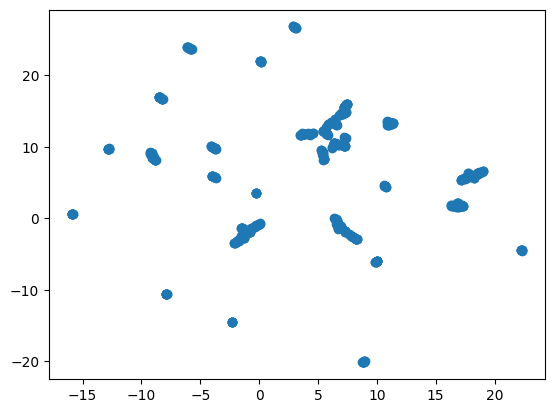

In [32]:
import matplotlib.pyplot as plt
import numpy as np


embeddings = np.array(subcorpus.umap_embeddings())
x = embeddings[:, 0]
y = embeddings[:, 1]
plt.scatter(x=x, y=y)

In [39]:
clusters = subcorpus.clusters(min_cluster_size=50)
print(len(clusters))

5


            x          y cluster
0    7.314966  11.182860       4
1    7.266143  11.230335       4
2    5.684646  11.794418       4
3    5.661408  11.877441       4
4    3.486028  11.632333       4
..        ...        ...     ...
559  0.088816  21.968414       0
560  0.114575  21.942661       0
561  0.178384  21.878874       0
562  0.184719  21.872358       0
563  0.153852  21.903400       0

[564 rows x 3 columns]


<Axes: xlabel='x', ylabel='y'>

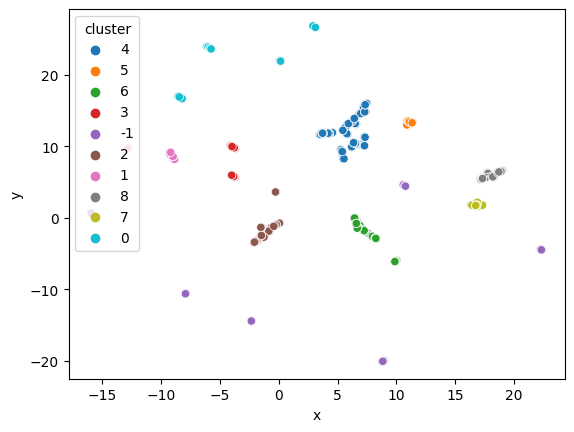

In [38]:
import pandas as pd
import seaborn as sns


rows = []

for cluster in clusters:
    embeddings = cluster.umap_embeddings()

    for embedding in embeddings:
        row = {}
        row["x"] = embedding[0]
        row["y"] = embedding[1]
        row["cluster"] = cluster._label
        rows.append(row)

data = pd.DataFrame(rows)
print(data)
sns.scatterplot(data=data, x="x", y="y", hue="cluster")

In [46]:
%autoreload now

from tempo_embeddings.visualization.wizmap import WizmapVisualizer

if "visualizer_all" in locals():
    # Cleanup previous run
    visualizer_all.cleanup()

visualizer_all = WizmapVisualizer(clusters[1], title="Efficiency in 1810 and 1960")

In [48]:
visualizer_all.visualize(port=port + 1)

Starting server on port 8002


<iframe
 srcdoc="<!DOCTYPE html><html lang="en"><head><meta charset="UTF-8" /><meta name="viewport" content="width=device-width, initial-scale=1.0" /><title>WizMap</title><style>html {font-size: 16px;-moz-osx-font-smoothing: grayscale;-webkit-font-smoothing: antialiased;text-rendering: optimizeLegibility;-webkit-text-size-adjust: 100%;-moz-text-size-adjust: 100%;scroll-behavior: smooth;}html, body {position: relative;width: 100%;height: 100%;overscroll-behavior: none;}body {margin: 0px;padding: 0px;box-sizing: border-box;font-family: -apple-system, BlinkMacSystemFont, 'Segoe UI', Roboto, Oxygen-Sans, Ubuntu, Cantarell, 'Helvetica Neue', sans-serif;color: hsl(0, 0%, 29%);font-size: 1em;font-weight: 400;line-height: 1.5;}*, ::after, ::before {box-sizing: inherit;}a {color: rgb(0, 100, 200);text-decoration: none;}a:hover {text-decoration: underline;}a:visited {color: rgb(0, 80, 160);}label {display: block;}input, select, textarea {font-family: inherit;font-size: inherit;-webkit-padding: 0 0;padding: 0;margin: 0 0 0 0;box-sizing: border-box;border: 1px solid #ccc;border-radius: 2px;}input:disabled {color: #ccc;}button {all: unset;outline: none;cursor: pointer;}</style><script defer src='data:text/javascript;base64,dmFyIHdpem1hcD1mdW5jdGlvbigpeyJ1c2Ugc3RyaWN0Ijt2YXIgSmY9T2JqZWN0LmRlZmluZVByb3BlcnR5O3ZhciBQZj0oZWksUSxhbik9PlEgaW4gZWk/SmYoZWksUSx7ZW51bWVyYWJsZTohMCxjb25maWd1cmFibGU6ITAsd3JpdGFibGU6ITAsdmFsdWU6YW59KTplaVtRXT1hbjt2YXIgbXQ9KGVpLFEsYW4pPT4oUGYoZWksdHlwZW9mIFEhPSJzeW1ib2wiP1ErIiI6USxhbiksYW4pO2Z1bmN0aW9uIGVpKCl7fWZ1bmN0aW9uIFEodCxsLGksZSxuKXt0Ll9fc3ZlbHRlX21ldGE9e2xvYzp7ZmlsZTpsLGxpbmU6aSxjb2x1bW46ZSxjaGFyOm59fX1mdW5jdGlvbiBhbih0KXtyZXR1cm4gdCgpfWZ1bmN0aW9uIGgwKCl7cmV0dXJuIE9iamVjdC5jcmVhdGUobnVsbCl9ZnVuY3Rpb24gb2UodCl7dC5mb3JFYWNoKGFuKX1mdW5jdGlvbiBwMCh0KXtyZXR1cm4gdHlwZW9mIHQ9PSJmdW5jdGlvbiJ9ZnVuY3Rpb24gYmQodCxsKXtyZXR1cm4gdCE9dD9sPT1sOnQhPT1sfHx0JiZ0eXBlb2YgdD09Im9iamVjdCJ8fHR5cGVvZiB0PT0iZnVuY3Rpb24ifWZ1bmN0aW9uIFlaKHQpe3JldHVybiBPYmplY3Qua2V5cyh0KS5sZW5ndGg9PT0wfWNvbnN0IHVjPXR5cGVvZiB3aW5kb3c8InUiP3dpbmRvdzp0eXBlb2YgZ2xvYmFsVGhpczwidSI/Z2xvYmFsVGhpczpnbG9iYWw7ZnVuY3Rpb24gWjAodCxsKXt0LmFwcGVuZENoaWxkKGwpfWZ1bmN0aW9uIFdvKHQsbCxpKXtjb25zdCBlPVJaKHQpO2lmKCFlLmdldEVsZW1lbnRCeUlkKGwpKXtjb25zdCBuPUQoInN0eWxlIik7bi5pZD1sLG4udGV4dENvbnRlbnQ9aSxIWihlLG4pfX1mdW5jdGlvbiBSWih0KXtpZighdClyZXR1cm4gZG9jdW1lbnQ7Y29uc3QgbD10LmdldFJvb3ROb2RlP3QuZ2V0Um9vdE5vZGUoKTp0Lm93bmVyRG9jdW1lbnQ7cmV0dXJuIGwmJmwuaG9zdD9sOnQub3duZXJEb2N1bWVudH1mdW5jdGlvbiBIWih0LGwpe3JldHVybiBaMCh0LmhlYWR8fHQsbCksbC5zaGVldH1mdW5jdGlvbiBUWih0LGwsaSl7dC5pbnNlcnRCZWZvcmUobCxpfHxudWxsKX1mdW5jdGlvbiBHMCh0KXt0LnBhcmVudE5vZGUmJnQucGFyZW50Tm9kZS5yZW1vdmVDaGlsZCh0KX1mdW5jdGlvbiBrWih0LGwpe2ZvcihsZXQgaT0wO2k8dC5sZW5ndGg7aSs9MSl0W2ldJiZ0W2ldLmQobCl9ZnVuY3Rpb24gRCh0KXtyZXR1cm4gZG9jdW1lbnQuY3JlYXRlRWxlbWVudCh0KX1mdW5jdGlvbiBjYyh0KXtyZXR1cm4gZG9jdW1lbnQuY3JlYXRlRWxlbWVudE5TKCJodHRwOi8vd3d3LnczLm9yZy8yMDAwL3N2ZyIsdCl9ZnVuY3Rpb24gc2kodCl7cmV0dXJuIGRvY3VtZW50LmNyZWF0ZVRleHROb2RlKHQpfWZ1bmN0aW9uIE50KCl7cmV0dXJuIHNpKCIgIil9ZnVuY3Rpb24gd1oodCxsLGksZSl7cmV0dXJuIHQuYWRkRXZlbnRMaXN0ZW5lcihsLGksZSksKCk9PnQucmVtb3ZlRXZlbnRMaXN0ZW5lcihsLGksZSl9ZnVuY3Rpb24gTVoodCxsLGkpe2k9PW51bGw/dC5yZW1vdmVBdHRyaWJ1dGUobCk6dC5nZXRBdHRyaWJ1dGUobCkhPT1pJiZ0LnNldEF0dHJpYnV0ZShsLGkpfWZ1bmN0aW9uIHZaKHQpe3JldHVybiBBcnJheS5mcm9tKHQuY2hpbGROb2Rlcyl9ZnVuY3Rpb24gbWQodCxsKXt0LnZhbHVlPWw9PW51bGw/IiI6bH1mdW5jdGlvbiBtbCh0LGwsaSl7dC5jbGFzc0xpc3RbaT8iYWRkIjoicmVtb3ZlIl0obCl9ZnVuY3Rpb24gSloodCxsLHtidWJibGVzOmk9ITEsY2FuY2VsYWJsZTplPSExfT17fSl7Y29uc3Qgbj1kb2N1bWVudC5jcmVhdGVFdmVudCgiQ3VzdG9tRXZlbnQiKTtyZXR1cm4gbi5pbml0Q3VzdG9tRXZlbnQodCxpLGUsbCksbn1sZXQgc3M7ZnVuY3Rpb24gb3ModCl7c3M9dH1mdW5jdGlvbiBQWigpe2lmKCFzcyl0aHJvdyBuZXcgRXJyb3IoIkZ1bmN0aW9uIGNhbGxlZCBvdXRzaWRlIGNvbXBvbmVudCBpbml0aWFsaXphdGlvbiIpO3JldHVybiBzc31mdW5jdGlvbiByZCh0KXtQWigpLiQkLm9uX21vdW50LnB1c2godCl9Y29uc3QgaGQ9W10sYm49W107bGV0IHBkPVtdO2NvbnN0IFgwPVtdLE5aPVByb21pc2UucmVzb2x2ZSgpO2xldCBhYz0hMTtmdW5jdGlvbiB6Wigpe2FjfHwoYWM9ITAsTloudGhlbih5MCkpfWZ1bmN0aW9uIGJjKHQpe3

127.0.0.1 - - [03/Aug/2023 15:52:08] "GET /grid.json HTTP/1.1" 200 -
127.0.0.1 - - [03/Aug/2023 15:52:08] "GET /data.ndjson HTTP/1.1" 200 -


# Clean Up

In [49]:
if False:  # Clean up manually when needed
    visualizer_1960.cleanup()
    visualizer_all.cleanup()